In this notebook we will merging the data which was downloaded in yearwise. We have so many small small chunk of data which I am going to complie it all and making a one data.csv file. after vreating data file, will perform EDA on top of it.
I have downloaded the data from NSE in yearwise. Now I am going to merge this data using pandas library.

The links which I have followed to download the nifty data is as follows,

1) https://moneyseth.com/blogs/Nifty-50-Stock-List-and-its-Weightage-in-Index - take top 30 Nifty stocks based on weightage

2) https://www1.nseindia.com/products/content/equities/equities/eq_security.htm - to Download top 30 nifty stocks historical data

3) https://www1.nseindia.com/products/content/equities/indices/historical_index_data.htm - To download nifty index historical data

4) https://www.investopedia.com/terms/t/total_return_index.asp - Total return index value

5) https://www1.nseindia.com/content/indices/Method_Nifty_50.pdf - Methodology of calculating total return index

6) https://finance.yahoo.com/quote/%5EVIX/history?period1=1104537600&period2=1663545600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true - To download VIX

above all links are useful to download the stock data

### Importing all Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import os

#### function that combines the yearly data

In [2]:
# I have dowloaded the 25 years of data of nifty50 index. Combining all that data.
# https://www.business-science.io/python/2021/09/21/python-read-csv.html - reading multiple csv files
# https://stackoverflow.com/questions/41181779/merging-2-dataframes-vertically - appending two dataframes.
# https://stackoverflow.com/questions/67750127/forming-a-loop-to-concatenate-multiple-csv-files-into-one-csv-file

def concat_data(path):
    
    year_data_list = os.listdir(path)

    file_names = []

    for i in year_data_list:
        file_names.append(path+i)
    
    dataframe_list = []
    
    for i in file_names:
        data = pd.read_csv(i)
        dataframe_list.append(data)
    
    return pd.concat(dataframe_list, ignore_index=True)

In [3]:
# concatinating nifty50 index data

nifty_df = concat_data('NIFTY_50 Index/')

In [4]:
# In combined_df, we will merge all our individual dataframe.
combined_df = nifty_df

In [5]:
# our nifty50 index data is not in increasing order of date. so first we will sort the data.
# https://www.geeksforgeeks.org/how-to-sort-a-pandas-dataframe-by-date/

combined_df['Date'] = pd.to_datetime(combined_df['Date'])

combined_df = combined_df.sort_values(by='Date')

In [6]:
# we are considering the data from Jan 2005 to sep 2022 (almost 17 years of data).
combined_df = combined_df.loc[combined_df['Date']>'2004-12-31']

In [7]:
# https://www.machinelearningplus.com/pandas/pandas-reset-index/#:~:text=To%20reset%20the%20index%20in,()%20with%20the%20dataframe%20object.&text=On%20applying%20the%20.,dataframe%20as%20a%20separate%20column.
combined_df = combined_df.reset_index()
combined_df.drop(['index'], axis=1, inplace=True)

In [60]:
# saving this dataframe for future use0
combined_df.to_csv('nifty50_jan-2005_to_sep-2022.csv')

Nifty50 index depends on performance of top 50 stocks. We have listed that top 50 stocks.

In [429]:
# 50 stocks on which nifty50 index depends
# https://stackoverflow.com/questions/46000191/utf-8-codec-cant-decode-byte-0x92-in-position-18-invalid-start-byte

top50_stocks = pd.read_csv(r'Nifty_30_based_on_weightage.csv', encoding='cp1252')
top50_stocks.head(50)

,Sr. No.,Company,NSE Symbol,Industry,Weightage
0,1,Reliance Industries Ltd.,RELIANCE,OIL & GAS,11.51%
1,2,HDFC Bank Ltd.,HDFCBANK,FINANCIAL SERVICES,8.36%
2,3,ICICI Bank Ltd.,ICICIBANK,FINANCIAL SERVICES,7.57%
3,4,Infosys Ltd.,INFY,IT,7.54%
4,5,Housing Development Finance Corporation Ltd.,HDFC,FINANCIAL SERVICES,5.72%
5,6,Tata Consultancy Services Ltd.,TCS,IT,4.55%
6,7,Kotak Mahindra Bank Ltd.,KOTAKBANK,FINANCIAL SERVICES,3.53%
7,8,ITC Ltd.,ITC,FMCG,3.52%
8,9,Hindustan Unilever Ltd.,HINDUNILVR,FMCG,3.13%
9,10,Larsen & Toubro Ltd.,LT,CONSTRUCTION,2.90%


from above table we can see that the weightage of stocks on nifty50 index. we are considereing top 15 stocks on weightage basis from various sectors. Below is the list of that 15 stocks.
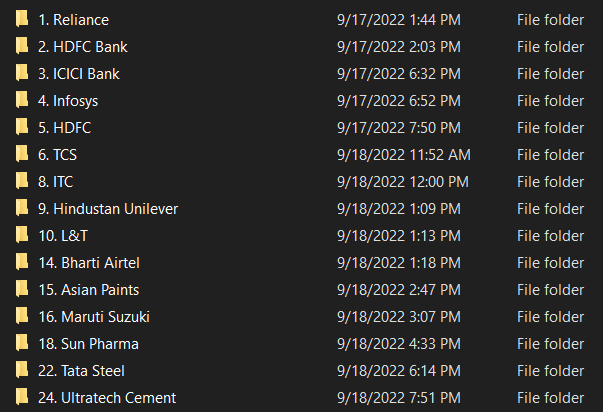

I am going to combine that stocks yealry data as we have combined the yearly nifty50 index data.

In [91]:
# Now, I am taking data of every stock.
# will take columns like closing price, shares traded amd turnover from each stock between data 03-Jan-2005 to 16-Sep-2022

stock_list = os.listdir('Nifty_50 Stocks')

def merging(stock):
    dataframe_list = []
    for i in stock:
        data =  concat_data('Nifty_50 Stocks/'+i+'/')
        data['Date'] = pd.to_datetime(data['Date'])
        data = data.sort_values(by='Date')
        data = data.loc[(data['Date']>'2004-12-31') & (data['Date']<'2022-09-17')]
        data = data.reset_index()
        data.drop(['index','Series','Symbol','Prev Close','Open Price','High Price','Low Price','Last Price','Average Price','No. of Trades','Deliverable Qty','% Dly Qt to Traded Qty'], axis=1, inplace=True)
        data['Turnover'] = data['Turnover']/10**7
        data.rename(columns = {'Close Price':i+'_close_price','Total Traded Quantity':i+'_trade_qty','Turnover':i+'_Turnover'},inplace = True)
        dataframe_list.append(data)
    return dataframe_list    

In [126]:
list_dataframe = merging(stock_list)

In [130]:
combined_stock_df = pd.concat(list_dataframe, axis=1)

In [139]:
combined_stock_df.drop(['Date'], axis=1, inplace=True)

In [138]:
Date_column = list_dataframe[0]['Date']

In [141]:
combined_stock_df.insert(0,'Date',Date_column)

In [144]:
stock_with_nifty = pd.merge(combined_df,combined_stock_df,on='Date')

In [146]:
stock_with_nifty.drop(['Open','High','Low'],axis=1,inplace=True)

In [150]:
Nifty_PE_PB_Div_df = concat_data('Nifty_PE_PB_Div/')
Nifty_PE_PB_Div_df['Date'] = pd.to_datetime(Nifty_PE_PB_Div_df['Date'])
Nifty_PE_PB_Div_df = Nifty_PE_PB_Div_df.sort_values(by='Date')
Nifty_PE_PB_Div_df = Nifty_PE_PB_Div_df.loc[(Nifty_PE_PB_Div_df['Date']>'2004-12-31') & (Nifty_PE_PB_Div_df['Date']<'2022-09-17')]
Nifty_PE_PB_Div_df = Nifty_PE_PB_Div_df.reset_index()
Nifty_PE_PB_Div_df.drop(['index'], axis=1, inplace=True)
Nifty_PE_PB_Div_df.shape

(4393, 4)

In [151]:
Nifty_PE_PB_Div_df.head()

,Date,P/E,P/B,Div Yield
0,2005-01-03,15.57,3.67,1.89
1,2005-01-04,15.49,3.65,1.90
2,2005-01-05,14.96,3.52,1.97
3,2005-01-06,14.71,3.47,2.00
4,2005-01-07,14.84,3.49,1.98


In [152]:
Nifty_Total_return_index_df = concat_data('Nifty_Total_return_index/')
Nifty_Total_return_index_df['Date'] = pd.to_datetime(Nifty_Total_return_index_df['Date'])
Nifty_Total_return_index_df = Nifty_Total_return_index_df.sort_values(by='Date')
Nifty_Total_return_index_df = Nifty_Total_return_index_df.loc[(Nifty_Total_return_index_df['Date']>'2004-12-31') & (Nifty_Total_return_index_df['Date']<'2022-09-17')]
Nifty_Total_return_index_df = Nifty_Total_return_index_df.reset_index()
Nifty_Total_return_index_df.drop(['index'], axis=1, inplace=True)
Nifty_Total_return_index_df.shape

(4393, 2)

In [154]:
stock_with_nifty_PEPB_df = pd.merge(stock_with_nifty,Nifty_PE_PB_Div_df,on='Date')

In [156]:
stock_nifty_PEPB_index_return_df = pd.merge(stock_with_nifty_PEPB_df,Nifty_Total_return_index_df,on='Date')

In [164]:
stock_nifty_PEPB_index_return_df.drop_duplicates(inplace=True)

In [229]:
# if see the dataset we do not have values for shares traded and turnover for the date of '2022-09-12'
# for this we will take average of  shares traded and turnover of the date '2022-09-12' and '2022-09-13'
# first we will convert columns shares traded and turnover into float.
# then we will find the values for date '2022-09-12'
stock_nifty_PEPB_index_return_df = stock_nifty_PEPB_index_return_df.replace('-', 0)
stock_nifty_PEPB_index_return_df[['Shares Traded', 'Turnover (Rs. Cr)']] = stock_nifty_PEPB_index_return_df[['Shares Traded', 'Turnover (Rs. Cr)']].astype(float)

In [246]:
stock_nifty_PEPB_index_return_df['Shares Traded'] = stock_nifty_PEPB_index_return_df['Shares Traded'].replace(0.0,(stock_nifty_PEPB_index_return_df.iloc[4387]['Shares Traded'] + stock_nifty_PEPB_index_return_df.iloc[4389]['Shares Traded'])/2)
stock_nifty_PEPB_index_return_df['Turnover (Rs. Cr)'] = stock_nifty_PEPB_index_return_df['Turnover (Rs. Cr)'].replace(0.0,(stock_nifty_PEPB_index_return_df.iloc[4387]['Turnover (Rs. Cr)'] + stock_nifty_PEPB_index_return_df.iloc[4389]['Turnover (Rs. Cr)'])/2)

### Calculating technical Indicators

In [ ]:
# https://medium.com/analytics-vidhya/how-to-build-stock-technical-indicators-with-python-7a0c5b665285
# now we will take nifty index data from the year 2001 and will find the following technical indicators for all days.
# then after we will take data from 2005 and merge it to our main data frame.
# we are calculating follwing technical indicators and will visualise this technical indicators in plot.
# 1) Simple moving avergae (SMA) - 10 days, 20 days ,200 days
# 2) Exponantial Moving average (EMA) - 10 days, 20 days ,200 days
# 3) Average Directional Movement (ADX)
# 4) Moving Average Convergence Divergence (MACD)
# 5) Relative Strength Index (RSI)
# 6) Bollinger Bands

nifty50_df = concat_data('NIFTY_50 Index/')
nifty50_df['Date'] = pd.to_datetime(nifty50_df['Date'])
nifty50_df = nifty50_df.sort_values(by='Date')
nifty50_df = nifty50_df.loc[nifty50_df['Date']>'2000-12-31']
nifty50_df = nifty50_df.reset_index()
nifty50_df.drop(['index'], axis=1, inplace=True)
nifty50_df.head()

In [251]:
# set Date column as a index
nifty50_df.set_index('Date', inplace=True)

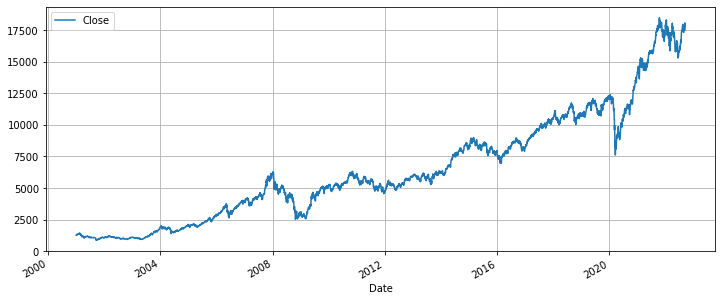

In [254]:
# Plot the close price of nifty50
# https://medium.com/analytics-vidhya/how-to-build-stock-technical-indicators-with-python-7a0c5b665285

nifty50_df['Close'].plot(legend=True,figsize=(12,5))
plt.grid(True)

from the above closing price of nifty50 index form last 22 years data, it is clear that data of nifty50 is highly volatile

### Simple Moving Average

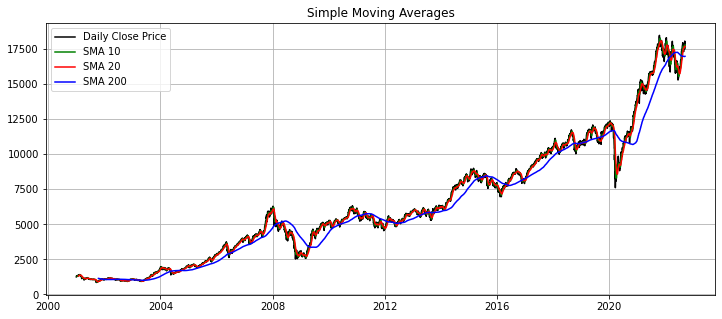

In [259]:
import talib

nifty50_df['SMA10'] = talib.SMA(nifty50_df['Close'], timeperiod=10)
nifty50_df['SMA20'] = talib.SMA(nifty50_df['Close'], timeperiod=20)
nifty50_df['SMA200'] = talib.SMA(nifty50_df['Close'], timeperiod=200)

plt.figure(figsize=(12, 5))
plt.plot(nifty50_df['Close'], color='black', label='Daily Close Price')
plt.plot(nifty50_df['SMA10'], color='green', label='SMA 10')
plt.plot(nifty50_df['SMA20'], color='red', label='SMA 20')
plt.plot(nifty50_df['SMA200'], color='blue', label='SMA 200')
plt.grid(True)
plt.legend()
plt.title('Simple Moving Averages')
plt.show()

1) above plot is a simple moving average. SMA is a trend indicator.

2) A simple moving average (SMA) is a rolling mean of the recent prices over a specific number of time periods (e.g. 10 days, 20 days, 50 days etc). SMA moves with the price and it can smooth out the daily price to show the price direction.

### Exponantial Moving average (EMA)

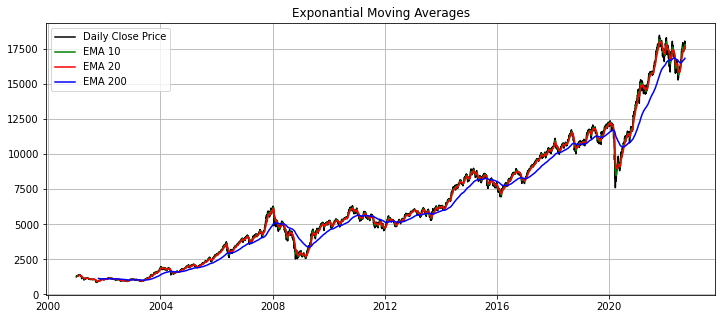

In [264]:
nifty50_df['EMA10'] = talib.EMA(nifty50_df['Close'], timeperiod=10)
nifty50_df['EMA20'] = talib.EMA(nifty50_df['Close'], timeperiod=20)
nifty50_df['EMA200'] = talib.EMA(nifty50_df['Close'], timeperiod=200)

plt.figure(figsize=(12, 5))
plt.plot(nifty50_df['Close'], color='black', label='Daily Close Price')
plt.plot(nifty50_df['EMA10'], color='green', label='EMA 10')
plt.plot(nifty50_df['EMA20'], color='red', label='EMA 20')
plt.plot(nifty50_df['EMA200'], color='blue', label='EMA 200')
plt.grid(True)
plt.legend()
plt.title('Exponantial Moving Averages')
plt.show()

1) above plot is exponantial moving average plot. EMA is also a trend indicator

2) EMA gives more weightage to recent data and calculate the average.

3) EMA calcualted by,
   EMA = Closing Price * multiplier + EMA_previous_day * (1-multiplier)

### Average Directional Movement (ADX)

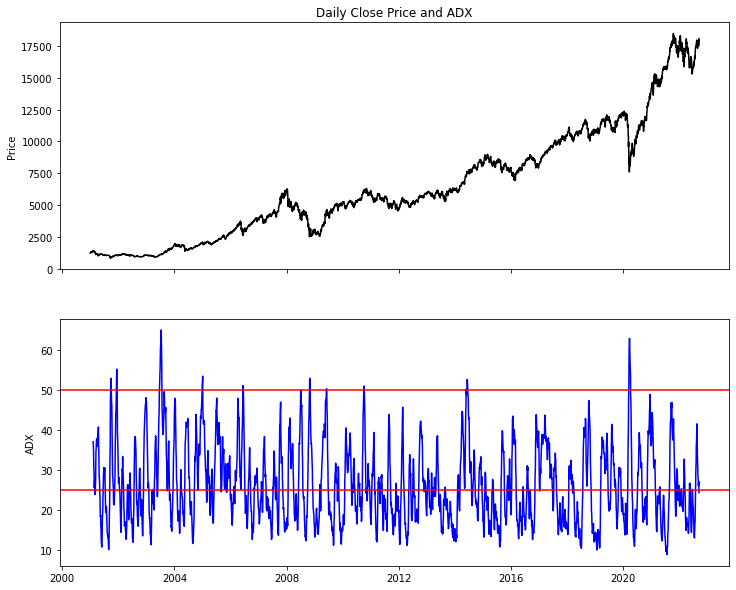

In [280]:
nifty50_df['ADX'] = talib.ADX(nifty50_df['High'], nifty50_df['Low'], nifty50_df['Close'], timeperiod=14)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 10))
ax1.set_ylabel('Price')
ax1.plot(nifty50_df['Close'], color='black')
ax2.set_ylabel('ADX')
ax2.plot(nifty50_df['ADX'], color='blue')
ax1.set_title('Daily Close Price and ADX')
ax2.axhline(y = 50, color = 'r', linestyle = '-')
ax2.axhline(y = 25, color = 'r', linestyle = '-')
plt.show()

1) above plot is average directional movement. It is also trend indicator.

2) The higher the magnitude of ADX, higher is the trend. low ADX means lower the trand.

3) ADX oscillate between 0 to 100. we can categorise ADX as follows,
   1) ADX<=25 (no trend)
   
   2) 25<=ADX<=50 (trend)
   
   3) ADX>=50 (strong trend)

### Moving Average Convergence Divergence (MACD)

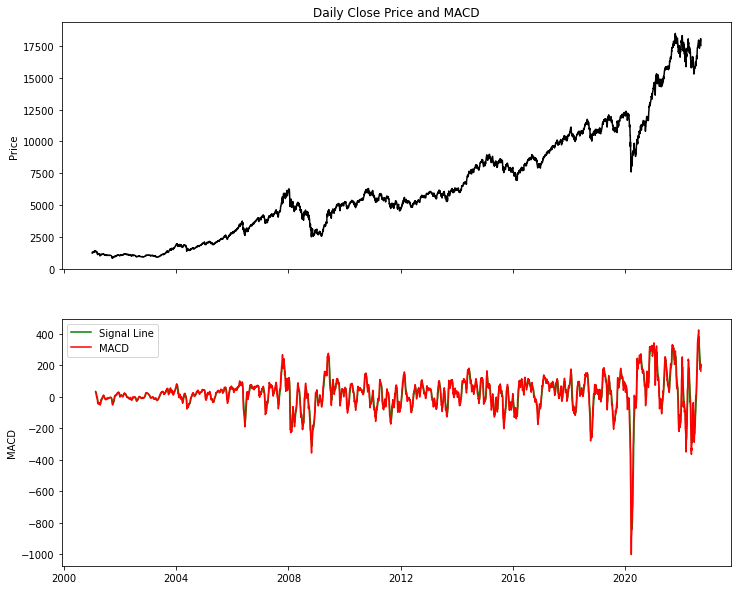

In [279]:
macd, macdsig, macdhist = talib.MACD(nifty50_df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
fig, (ax1, ax2) = plt.subplots(2, sharex=True,figsize=(12, 10))
ax1.set_ylabel('Price')
ax1.plot(nifty50_df['Close'], color='black')
ax2.set_ylabel('MACD')
ax2.plot(macdsig, color='green', label='Signal Line')
ax2.plot(macd, color='red', label='MACD')
ax1.set_title('Daily Close Price and MACD')
plt.legend()
plt.show()

1) Moving average convergence divergence is difference between two moving averages. MACSD is a momentum indicator.

2) It is calculated by subtracting the EMA-26 from the EMA-12. This will result in a MACD line. 

3) Another EMA-9 of the MACD will also be plotted on top of the MACD line as the signal line to trigger a buy and sell action.

In [284]:
nifty50_df['macd'] = macd
nifty50_df['macdsig'] = macdsig

### Relative Strength Index (RSI)

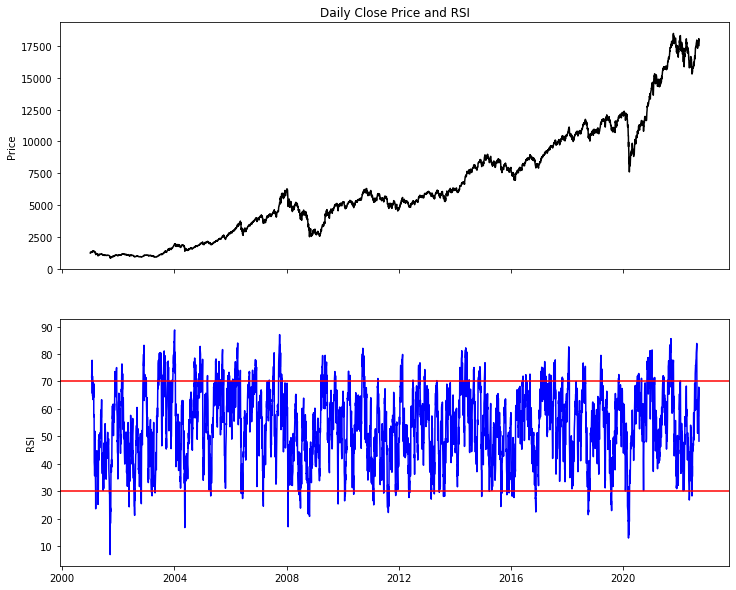

In [286]:
nifty50_df['RSI'] = talib.RSI(nifty50_df['Close'], timeperiod=14)
fig, (ax1, ax2) = plt.subplots(2, sharex=True,figsize=(12, 10))
ax1.set_ylabel('Price')
ax1.plot(nifty50_df['Close'],color = 'black')
ax2.set_ylabel('RSI')
ax2.plot(nifty50_df['RSI'], color='blue')
ax2.axhline(y = 70, color = 'r', linestyle = '-')
ax2.axhline(y = 30, color = 'r', linestyle = '-')
ax1.set_title('Daily Close Price and RSI')
plt.show()

1) Relative strength indicator is used as a momentum indicator.

2) This momentum indicator shows if perticular stocks is overbought or oversold.

3) If RSI > 70 --> overbought

4) If RSI < 30 --> Oversold

### Bollinger Bands

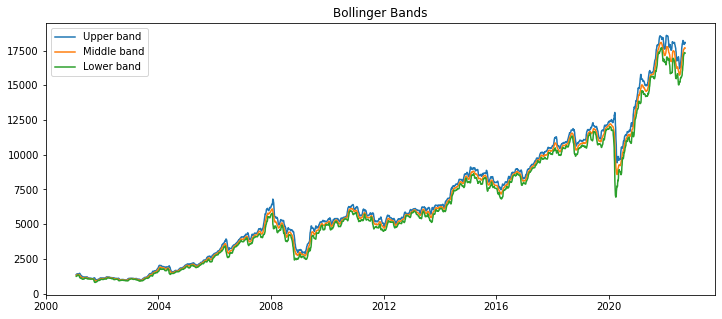

In [289]:
upper, mid, lower = talib.BBANDS(nifty50_df['Close'], nbdevup=2, nbdevdn=2, timeperiod=20)
plt.figure(figsize=(12, 5))
plt.plot(upper, label="Upper band")
plt.plot(mid, label='Middle band')
plt.plot(lower, label='Lower band')
plt.title('Bollinger Bands')
plt.legend()
plt.show()

1) A Bollinger Band is composed of three trendlines that form a middle band, upper band and lower band, respectively.

2) Middle band — A simple moving average (20 days by standard)

3) Upper band — 2 standard deviations above the middle band

4) Lower band — 2 standard deviations below the middle band

5) The wider the distance between the upper and lower bands, the more volatile the stock prices. A price close to the upper band is considered relatively high. On another hand, when the price close to the lower band, it is viewed as relatively low.

In [291]:
nifty50_df['BB_upper'] = upper
nifty50_df['BB_mid'] = mid
nifty50_df['BB_lower'] = lower

In [293]:
nifty50_df.drop(['Open','High','Low','Shares Traded','Turnover (Rs. Cr)'], axis=1, inplace=True)

In [297]:
# https://www.skytowner.com/explore/converting_index_to_datetime_in_pandas

nifty50_df['Date'] = pd.to_datetime(nifty50_df.index)

In [301]:
# https://datagy.io/pandas-drop-index-column/#:~:text=The%20most%20straightforward%20way%20to,a%20column%20in%20the%20dataframe.

nifty50_df.drop(['Date'], axis=1, inplace=True)
nifty50_df = nifty50_df.reset_index()

In [303]:
# we will take data only from 01-01-2005 to 16-09-2022

nifty50_df = nifty50_df.loc[(nifty50_df['Date']>'2004-12-31') & (nifty50_df['Date']<'2022-09-17')]

In [305]:
nifty50_df = nifty50_df.reset_index()

In [307]:
nifty50_df.drop(['index'], axis=1, inplace=True)

In [309]:
nifty50_df.drop(['Close'], axis=1, inplace=True)

In [311]:
final_df = pd.merge(stock_nifty_PEPB_index_return_df,nifty50_df,on='Date')

In [333]:
# we will predicts next day's closing price based todays features. so will shift closing price by one day.
# we will give 01-5-2010 features to 02-05-2010 closing price.

next_day_close = final_df['Close'].values

In [334]:
next_day_close = next_day_close[1:]

In [338]:
# https://stackoverflow.com/questions/47804259/add-element-in-first-an-last-position-python-numpy-array
# 17622.25 is the value of 19-09-2022.

next_day_close = np.concatenate((next_day_close, [17622.25]))

In [341]:
final_df['next_day_close'] = next_day_close

In [343]:
# we will save the final dataframe in csv formate

final_df.to_csv('final_data_df.csv')

In [365]:
# we will read the final_df file that we have saved.

final_df = pd.read_csv('final_data_df.csv', index_col=0)
final_df.head()

,Date,Close,Shares Traded,Turnover (Rs. Cr),Asian Paints_close_price,Asian Paints_trade_qty,Asian Paints_Turnover,Bharti Airtel_close_price,Bharti Airtel_trade_qty,Bharti Airtel_Turnover,...,EMA20,EMA200,ADX,macd,macdsig,RSI,BB_upper,BB_mid,BB_lower,next_day_close
0,2005-01-03,2115.00,70506865.0,2375.10,319.10,17273,0.552009,228.30,2085182,46.826988,...,2034.300202,1764.815581,52.459247,43.080271,42.192244,78.071485,2109.103066,2033.4650,1957.826934,2103.75
1,2005-01-04,2103.75,72718302.0,2416.13,324.05,32240,1.041647,226.10,2674072,60.747563,...,2040.914468,1768.188063,53.349588,43.440560,42.441907,73.511082,2118.096165,2039.0175,1959.938835,2032.20
2,2005-01-05,2032.20,109223487.0,3622.02,321.85,30500,0.985153,210.35,4986782,105.831200,...,2040.084519,1770.815048,50.160769,37.520097,41.457545,52.504719,2115.807341,2041.7300,1967.652659,1998.35
3,2005-01-06,1998.35,94321939.0,3233.82,309.45,38985,1.208025,211.20,5461079,116.873088,...,2036.109803,1773.079077,47.363079,29.753693,39.116775,45.832030,2115.135464,2042.1500,1969.164536,2015.50
4,2005-01-07,2015.50,76285818.0,2764.03,320.05,17621,0.557419,210.15,5094265,105.402352,...,2034.146964,1775.491225,44.765225,24.697922,36.233004,49.344550,2110.634773,2044.4750,1978.315227,1982.00


In [366]:
# bymistake we have removed nifty50 'open', 'high', 'Low' values. We will add it.

nifty_sample = pd.read_csv('nifty50_jan-2005_to_sep-2022.csv', index_col=0)
nifty_sample.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,2005-01-03,2080.00,2118.60,2080.00,2115.00,70506865,2375.1
1,2005-01-04,2116.95,2120.15,2100.55,2103.75,72718302,2416.13
2,2005-01-05,2103.75,2105.10,1990.15,2032.20,109223487,3622.02
3,2005-01-06,2031.55,2035.65,1984.25,1998.35,94321939,3233.82
4,2005-01-07,1998.25,2021.45,1992.55,2015.50,76285818,2764.03


In [367]:
Nifty_open = nifty_sample['Open']
Nifty_high = nifty_sample['High']
Nifty_low = nifty_sample['Low']

final_df['Open'] = Nifty_open
final_df['High'] = Nifty_high
final_df['Low'] = Nifty_low

In [369]:
first_column = final_df.pop('Open')
final_df.insert(1, 'Open', first_column)

In [371]:
second_column = final_df.pop('High')
final_df.insert(2, 'High', second_column)

In [372]:
third_column = final_df.pop('Low')
final_df.insert(3, 'Low', third_column)

In [374]:
final_df.to_csv('revised_final_data_df.csv')

In [437]:
# We will read csv file that we have saved recently.

final_df = pd.read_csv('revised_final_data_df.csv',index_col=0)

## EDA (Exploratory Data Analysis)

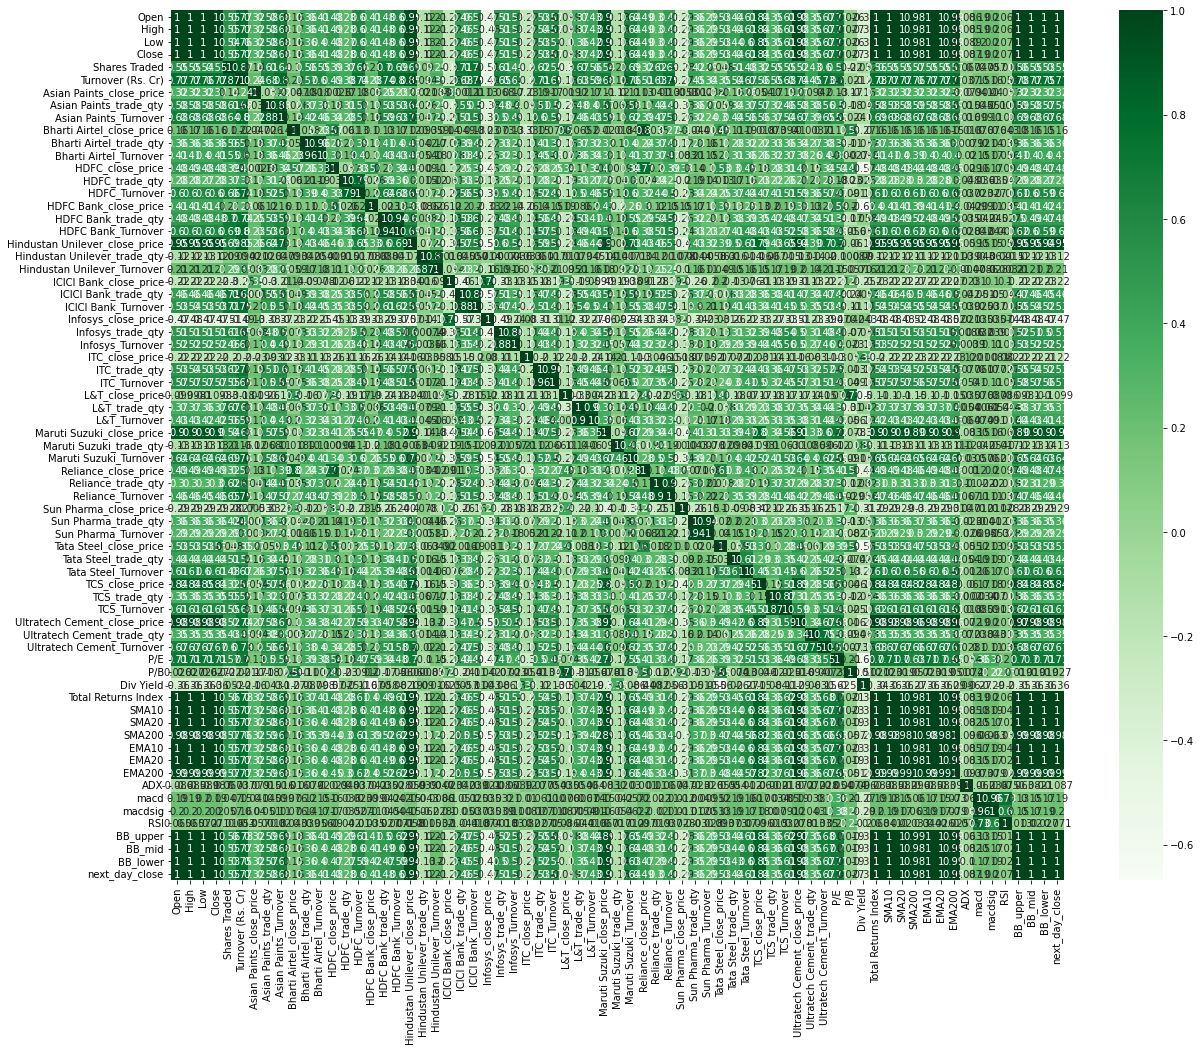

In [398]:
# First we will plot corelation matrix to see the relation of each parameter with next_day_close
# https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
import seaborn as sns

plt.figure(figsize=(20,16))
sns.heatmap(final_df.corr(), cmap="Greens",annot=True)
plt.show()

1) In above correlation matrix we can see that OHLC, are highly correlated. this is because of OHLC comes from same distribution.

In [438]:
# in correlation plot we can not see relation clearly between two variables or features
# so we will calculate by correlation of every features with target variable i.e. next_day_close
# https://www.geeksforgeeks.org/how-to-calculate-correlation-between-two-columns-in-pandas/#:~:text=By%20using%20corr()%20function,two%20columns%20in%20the%20dataframe.

corr_list = []

for i in range(1,len(final_df.columns)):
    corr_result = final_df[final_df.columns[i]].corr(final_df['next_day_close'])
    corr_list.append(corr_result)
    print('Corelation of {} with column next_day_close is {}'.format(final_df.columns[i],corr_result))

Corelation of Open with column next_day_close is 0.9994746678598715
Corelation of High with column next_day_close is 0.9995952411581516
Corelation of Low with column next_day_close is 0.9995942372169595
Corelation of Close with column next_day_close is 0.9996994569897233
Corelation of Shares Traded with column next_day_close is 0.5471972742780716
Corelation of Turnover (Rs. Cr) with column next_day_close is 0.7680549185437201
Corelation of Asian Paints_close_price with column next_day_close is 0.3163116499889966
Corelation of Asian Paints_trade_qty with column next_day_close is 0.5779646286884994
Corelation of Asian Paints_Turnover with column next_day_close is 0.6779888283896328
Corelation of Bharti Airtel_close_price with column next_day_close is 0.1637138115464348
Corelation of Bharti Airtel_trade_qty with column next_day_close is 0.3631593816064477
Corelation of Bharti Airtel_Turnover with column next_day_close is 0.40619592171865937
Corelation of HDFC_close_price with column next_

### EDA of all Numeric data (We only have Numeric Data)

In [445]:
# code snippet tasken from https://github.com/rohansawant7978/bitcoin-price-forecasting/blob/main/02_Exploratory_Data_Analysis.ipynb

import random

def plot_data(df,feature_name,exclude_feature='next_day_close'):
    random_color = (random.random(), random.random(), random.random())
    df.plot(x='Date',y=feature_name,figsize=(25,5),grid=True,color=random_color)
    plt.title(f'Date VS {feature_name.replace("_"," ")}')
    plt.ylabel(feature_name)
    plt.show()

    df.plot(kind='kde',y=feature_name,figsize=(25,5),grid=True,color=random_color)
    plt.title(f'KDE-{feature_name.replace("_"," ")}')
    plt.show()

#### Plot for Next_day_close

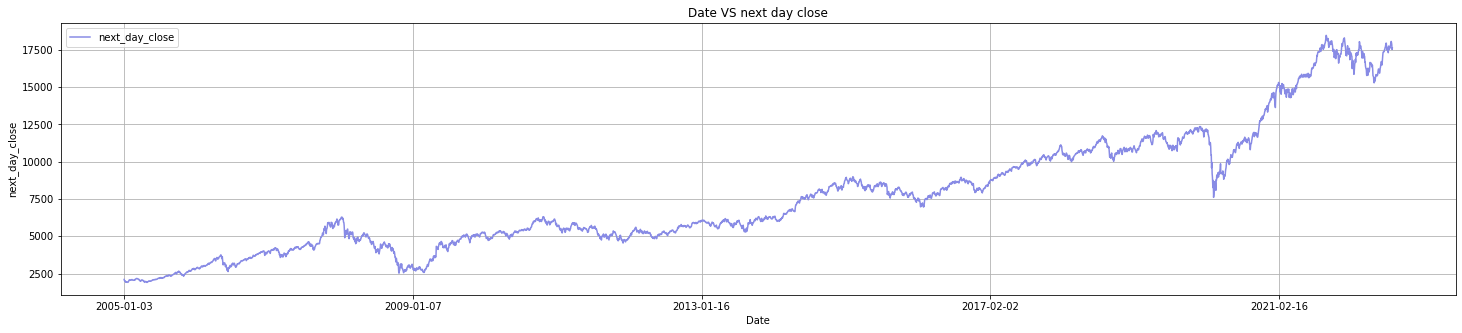

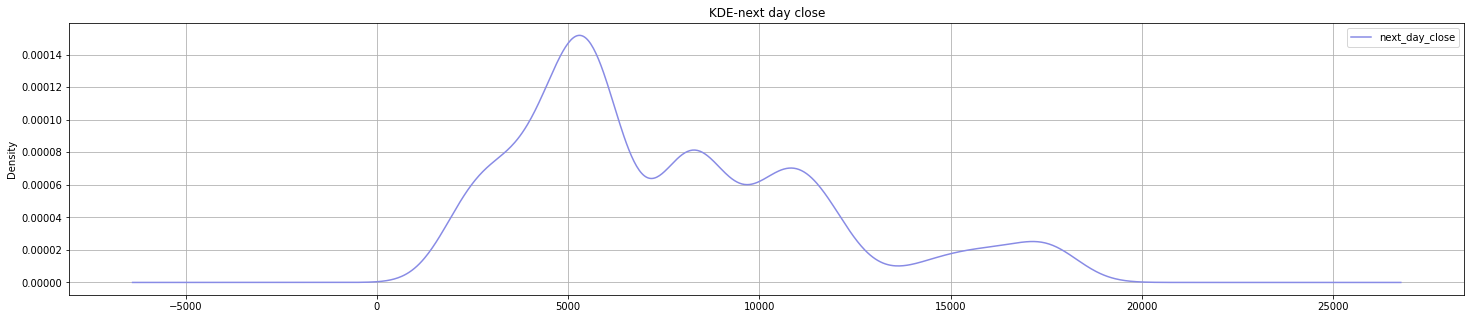

In [446]:
# let's analyse next_close_price.

plot_data(final_df, 'next_day_close',exclude_feature='next_day_close')

1) from above plot it is clear that next_day_close price is highly volatile after 2017.

2) Also we can see that prices are continuesly increasing as time passes.

3) distribution of next_day_close prices are slightly right skewed.

### Plot of 5 stock close price based on weightage

#### Plot for Reliance Close Price

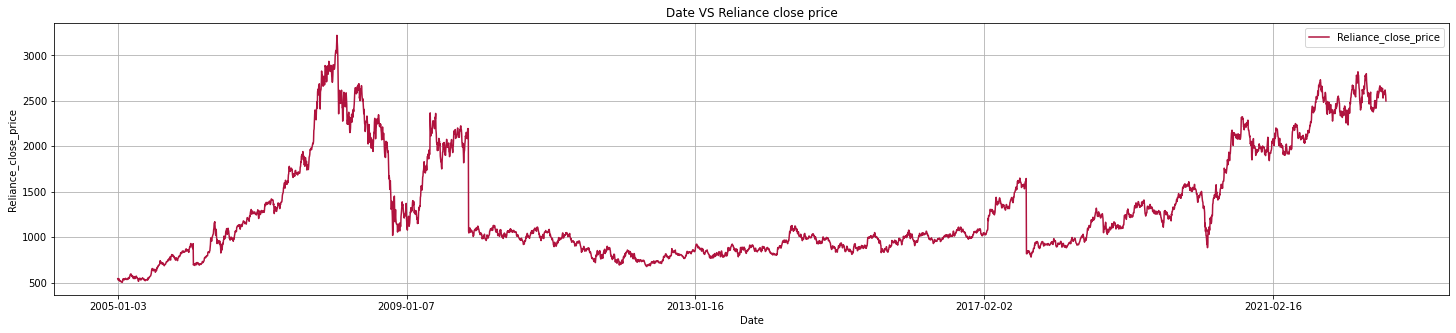

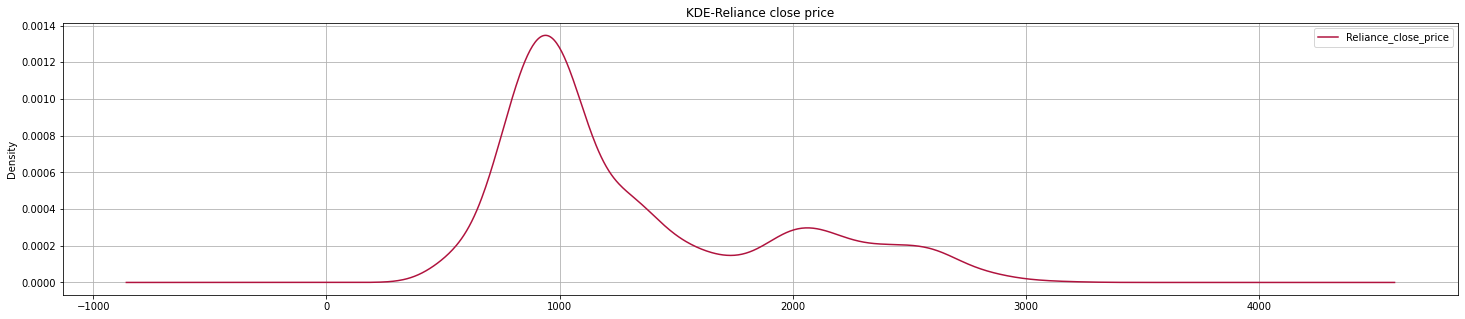

In [447]:
plot_data(final_df,'Reliance_close_price',exclude_feature='Reliance_close_price')

1) we can see that reliance data are highly volatile in nature.

2) Reliance data has right skewed distribution.

3) as we can see the distribution of next_day_close price and reliance close price, it is partially matching. therefore corelation of reliance and next day close price is low.

4) We can see that, reliance price is not volatile between year 2010 to 2017

#### Plot of HDFC Bank

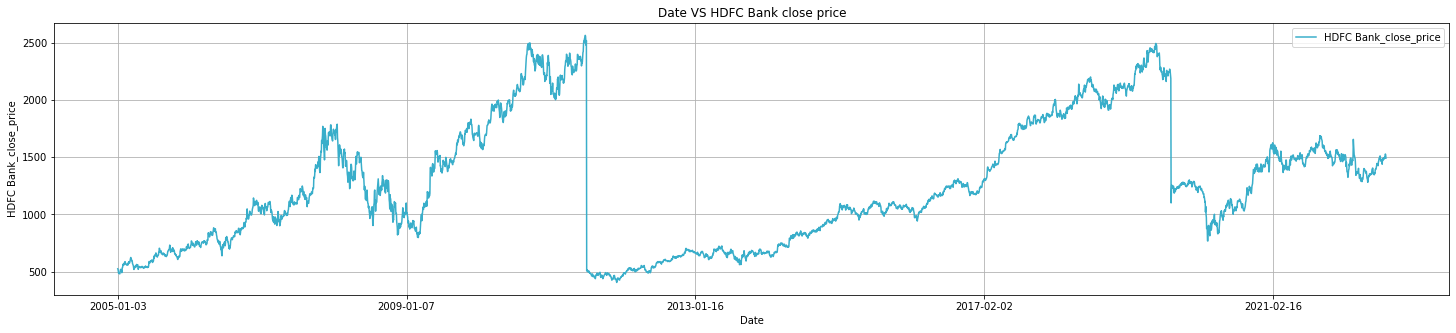

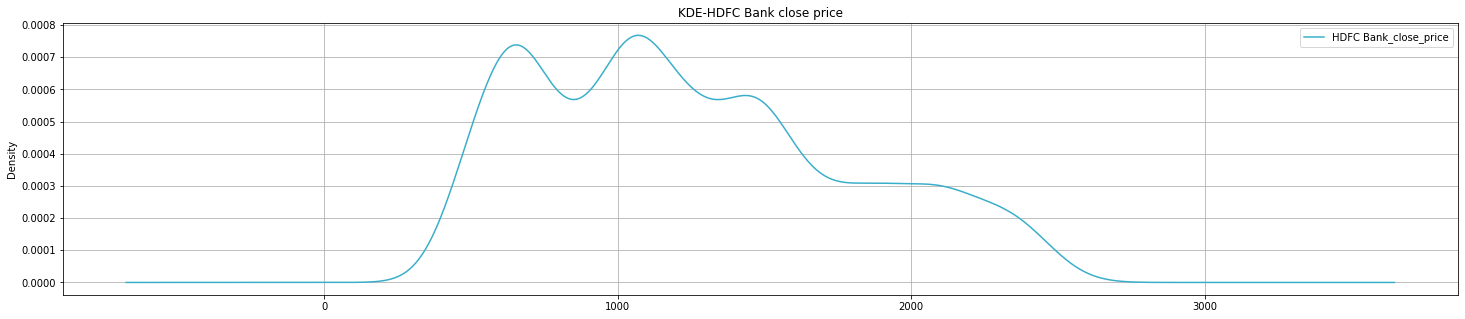

In [448]:
plot_data(final_df,'HDFC Bank_close_price',exclude_feature='HDFC Bank_close_price')

1) As we can see that price of HDFC prices are highly volatile.

2) distribution of Prices of HDFC are approximately right skewed.

3) we can see that sudden deacrease in prices. it because of shares price splitted in some ratios.

4) as we can see the distribution of next_day_close price and HDFC prices, it is partially matching. therefore corelation of HDFC prices and next day close price is low. 

#### Plot ICICI Bank

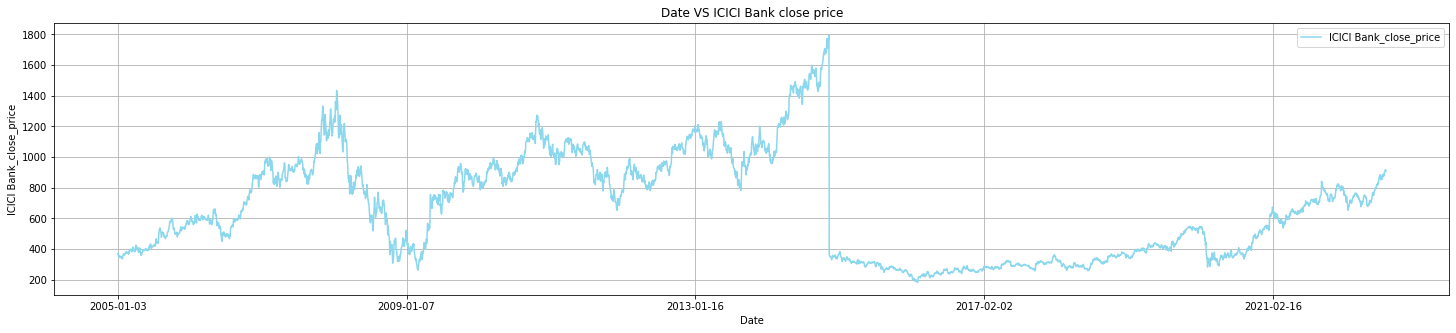

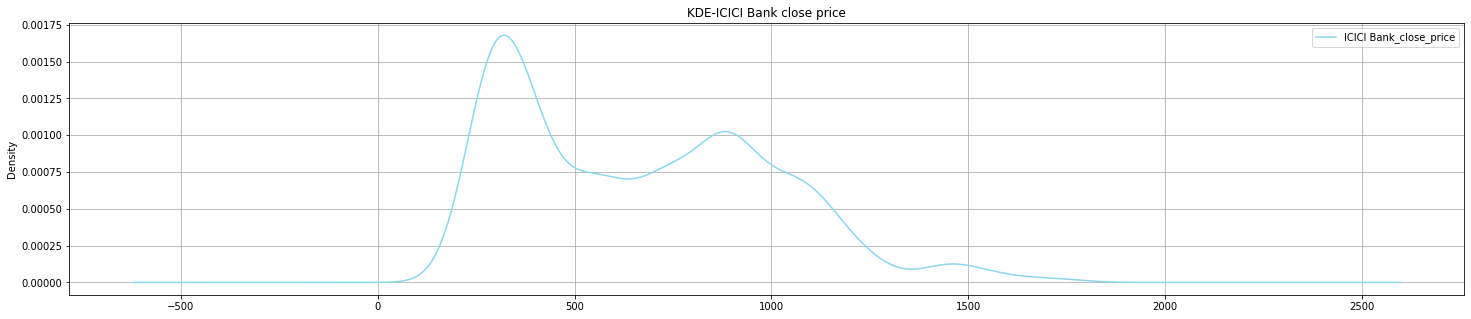

In [449]:
plot_data(final_df,'ICICI Bank_close_price',exclude_feature='ICICI Bank_close_price')

1) As we can see in plot that price of ICICI bank is highly volatile.

2) Distribution of prices of ICICI bank is right skewed.

3) We can see that sudden deacrese in price of ICICI bank price. It is may be a shares splitted in some ratios.

4) Distribution of Next_day_close price and ICICI bank price is different and therefore correlation is low.

#### Plot fof Infosys_close_price

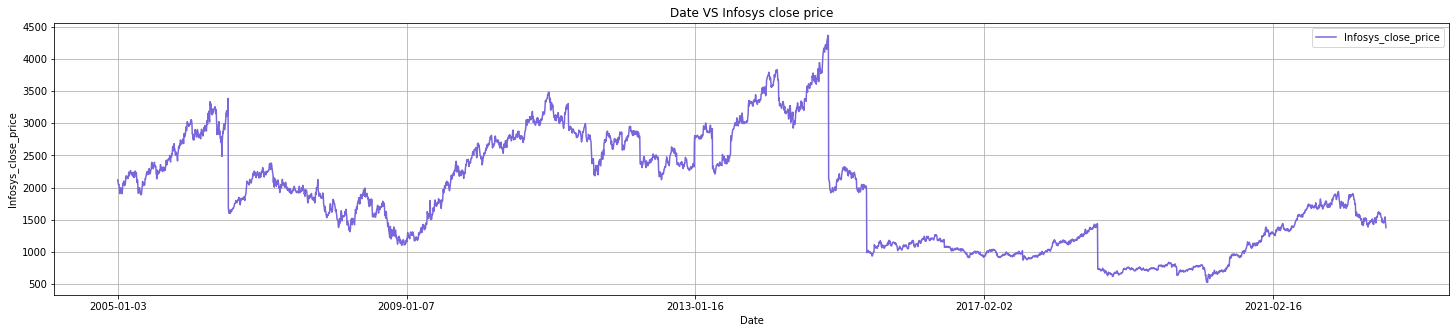

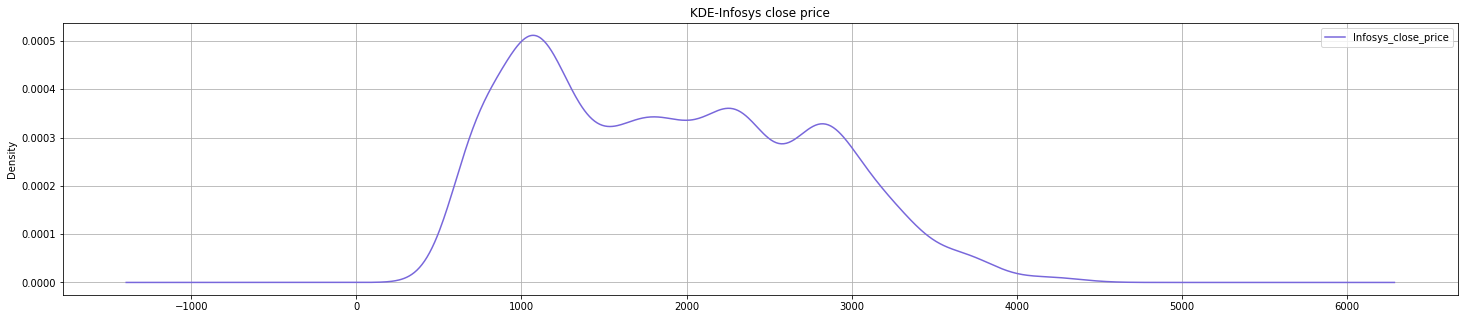

In [450]:
plot_data(final_df,'Infosys_close_price',exclude_feature='Infosys_close_price')

1) Price of Infosys is highly volatile in nature.

2) Distributon of prices of infosys is right skewed.

3) Infosys close price and next_day_close price distribution is not equal therfore correlation between them is low.

#### Plot of HDFC_close_price

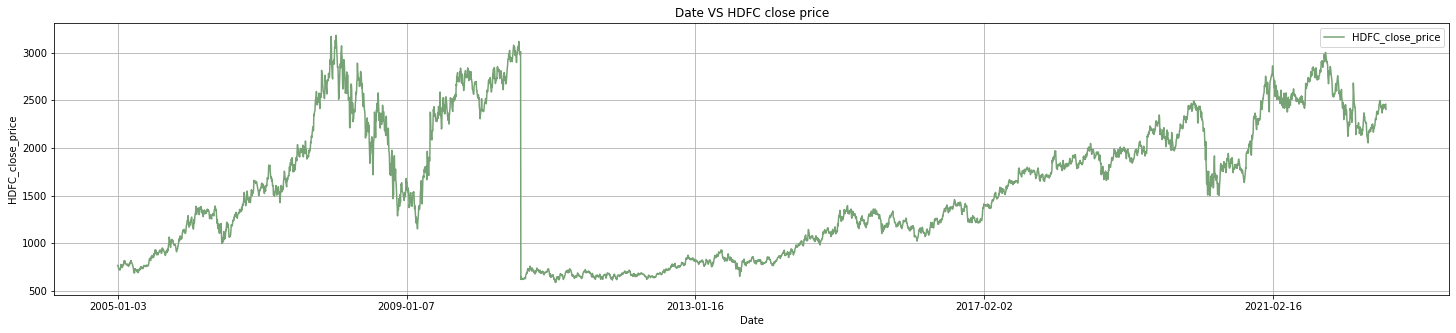

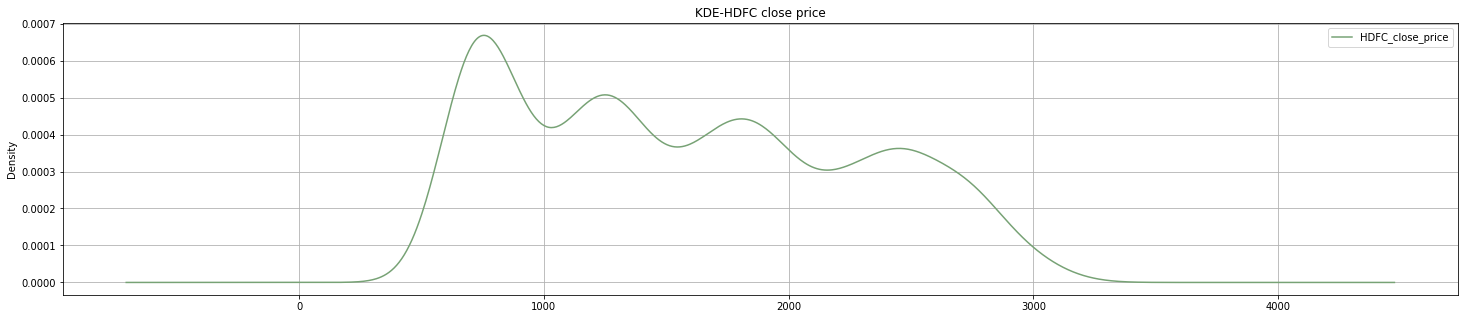

In [451]:
plot_data(final_df,'HDFC_close_price',exclude_feature='HDFC_close_price')

1) prices of HDFC are highly volatile in nature.

2) We can see sudden price decrease. possible reason of decrease it shares might be splited in some ration. Face value of shares decreases.

3) HDFC close price and next_day_close price distribution is not equal therfore correlation between them is low.

#### Plot of Total Returns Index

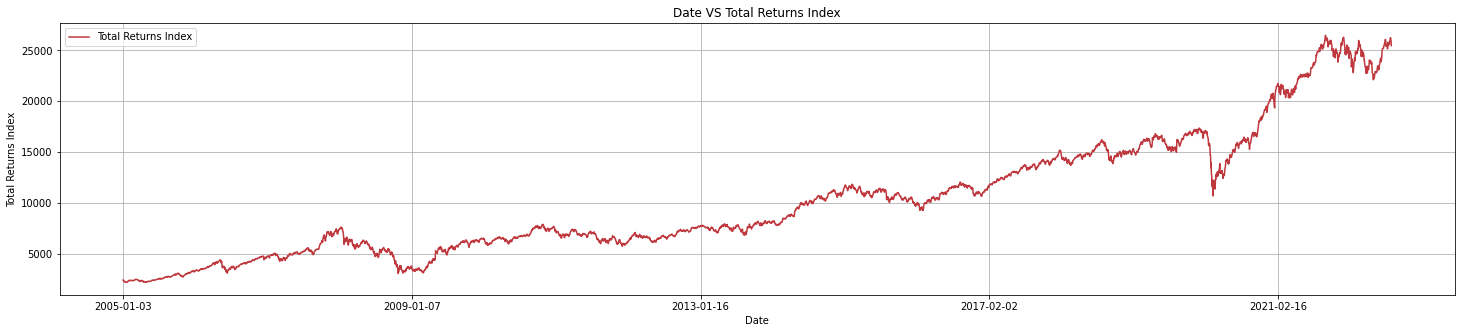

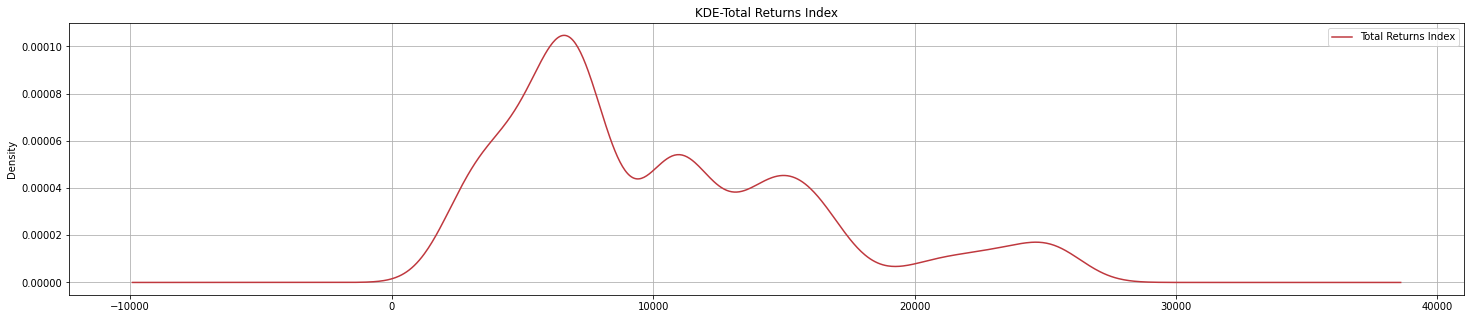

In [452]:
plot_data(final_df,'Total Returns Index',exclude_feature='Total Returns Index')

1) As we can see that plot of Total return index and next_day_close is matching or we can say that it is identical.

2) Distribtion of total return index is right skewed.

3) because of distribution matches between total return index and next_day_close is equal therefore we are getting high correlation.

1) We can see that stocks distribution is not matching with next_day_close. therefore we are getting low correlation between.

2) Therefore it is good practise to avoid this features which does not contribute towards target variable.

3) We will exclude this feature in feature selection procedure.